# Films' and actors' rating analysis

In [46]:
import pandas as pd
from pandasql import sqldf
from matplotlib import pyplot as plt


pysqldf = lambda q: sqldf(q, globals())

## Database overview

There are provided types of columns, examples of rows and general statistics for understanding data we are working with.

In [9]:
db = pd.read_csv('film.csv', sep=';')

db = db.convert_dtypes()
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1659 non-null   Int64 
 1   Length      1592 non-null   Int64 
 2   Title       1659 non-null   string
 3   Subject     1657 non-null   string
 4   Actor       1651 non-null   string
 5   Actress     1281 non-null   string
 6   Director    1406 non-null   string
 7   Popularity  1653 non-null   Int64 
 8   Awards      1659 non-null   string
dtypes: Int64(3), string(6)
memory usage: 121.6 KB


In [10]:
pysqldf('''
    SELECT *
    FROM db;
''')

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards
0,1990,111.0,Tie Me Up! Tie Me Down!,Comedy,"Banderas, Antonio","Abril, Victoria","Almod�var, Pedro",68.0,No
1,1991,113.0,High Heels,Comedy,"Bos�, Miguel","Abril, Victoria","Almod�var, Pedro",68.0,No
2,1983,104.0,"Dead Zone, The",Horror,"Walken, Christopher","Adams, Brooke","Cronenberg, David",79.0,No
3,1979,122.0,Cuba,Action,"Connery, Sean","Adams, Brooke","Lester, Richard",6.0,No
4,1978,94.0,Days of Heaven,Drama,"Gere, Richard","Adams, Brooke","Malick, Terrence",14.0,No
...,...,...,...,...,...,...,...,...,...
1654,1932,226.0,"Shadow of the Eagle, The",Action,"Wayne, John",None,None,19.0,No
1655,1989,103.0,Blood & Guns,Action,"Welles, Orson",None,None,43.0,No
1656,1988,78.0,Hot Money,Drama,"Welles, Orson",None,None,19.0,No
1657,1977,75.0,Comedy Tonight,Comedy,"Williams, Robin",None,None,18.0,No


In [12]:
db.describe()

,Year,Length,Popularity
count,1659.000000,1592.000000,1653.000000
mean,1975.802893,105.179648,43.110103
std,17.057848,30.629501,26.747406
min,1920.000000,5.000000,0.000000
25%,1967.000000,90.000000,19.000000
50%,1983.000000,102.000000,43.000000
75%,1989.000000,116.000000,67.000000
max,1997.000000,450.000000,88.000000


## Proposal and Hypotesis

There is a database describing films, their popularity, actors, types, and length. As we can see, we are dealing with films during the 1920 to the 1997 period. Length of films differs a lot (from 5 to 450 minutes).

We will explore and try to answer the following questions:

1. Well, the first question is about correlation between Awards and Popularity of films. As one can notice, critics and ordinary audience are not always agree about film quality. 

2. There is my own hypotesis: if actor or actress gets an award, he or she has higher probability to get it again.

### Question no.1

We will count the average and mean for films with and without awards.

In [23]:
awards_films = pd.DataFrame(pysqldf(
    '''
        SELECT *
        FROM db
        WHERE Awards != 'No';
    '''
))

awards_films.describe()

,Year,Length,Popularity
count,163.000000,159.000000,163.000000
mean,1973.220859,126.345912,41.269939
std,13.168436,35.773016,29.407957
min,1928.000000,81.000000,0.000000
25%,1966.000000,104.500000,8.000000
50%,1974.000000,119.000000,39.000000
75%,1984.000000,134.000000,71.000000
max,1992.000000,360.000000,88.000000


In [22]:
no_awards_films = pd.DataFrame(pysqldf(
    '''
        SELECT *
        FROM db
        WHERE Awards != 'Yes';
    '''
))

no_awards_films.describe()

,Year,Length,Popularity
count,1496.000000,1433.000000,1490.000000
mean,1976.084225,102.831124,43.311409
std,17.409708,29.083908,26.443110
min,1920.000000,5.000000,0.000000
25%,1967.000000,90.000000,20.000000
50%,1984.000000,100.000000,44.000000
75%,1989.000000,113.000000,67.000000
max,1997.000000,450.000000,88.000000


As we can see, average and mean popularity ratings for this categories do not differ a lot. 
The graphic below compares critics and other audience average popularitiy schores for each year.

In [42]:
table_avg_popularity = pd.DataFrame(pysqldf(
'''
    SELECT AVG(Popularity) AS Popularity,
           Year,
           Awards
    FROM db
    GROUP BY Year, Awards
    ORDER BY Year DESC;
'''
))

table_avg_popularity

,Popularity,Year,Awards
0,60.000000,1997,No
1,39.000000,1996,No
2,41.666667,1993,No
3,41.372093,1992,No
4,45.000000,1992,Yes
...,...,...,...
117,63.000000,1926,No
118,73.000000,1925,No
119,72.000000,1924,No
120,NaN,1923,No


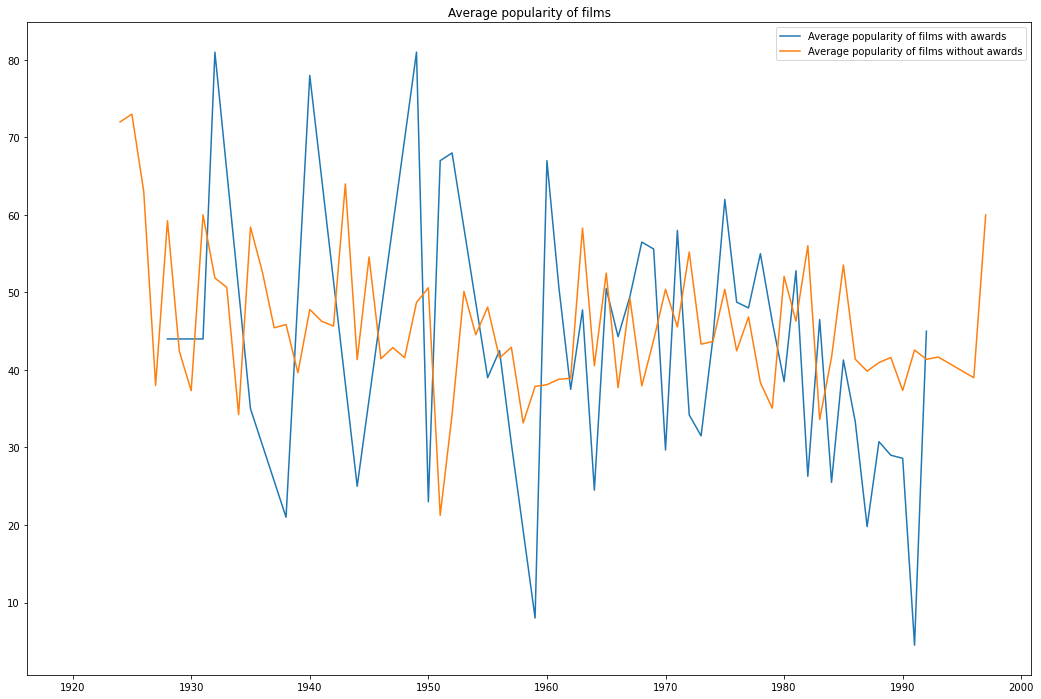

In [45]:
plt.rcParams["figure.figsize"] = (18, 12)

plt.subplot(1, 1, 1)
plt.plot(table_avg_popularity['Year'][table_avg_popularity['Awards'] == 'Yes'], table_avg_popularity['Popularity'][table_avg_popularity['Awards'] == 'Yes'], label='Average popularity of films with awards')
plt.plot(table_avg_popularity['Year'][table_avg_popularity['Awards'] == 'No'], table_avg_popularity['Popularity'][table_avg_popularity['Awards'] == 'No'], label='Average popularity of films without awards')
plt.title('Average popularity of films')
plt.legend()

Analyzing graphic below, one can notice, that popularity of films with awards not always higher than the popularity of films without awards. And as we can notice suppose there are about 8 years, when the critics' choice was extremely unpopular among ordinary viewers. 

In [122]:
years_of_awards = pd.DataFrame(pysqldf(
'''
    SELECT COUNT(Year) AS year_count, 
           Year
    FROM (
        SELECT AVG(Popularity) AS average_popularity_per_year,
               Year,
               Awards
        FROM db
        GROUP BY Year, Awards
    ) AS t
    GROUP BY Year
    HAVING year_count != 1
    ORDER BY Year DESC;
'''
))['Year']

popularity = pysqldf(
f'''
    SELECT AVG(Popularity) AS avg_popularity,
           Year,
           Awards
    FROM db
    GROUP BY Year, Awards
    HAVING Year IN ({str(list(years_of_awards))[1:-1:]});
'''
)

popularity

,avg_popularity,Year,Awards
0,59.250000,1928,No
1,44.000000,1928,Yes
2,60.000000,1931,No
3,44.000000,1931,Yes
4,51.857143,1932,No
...,...,...,...
91,28.600000,1990,Yes
92,42.574803,1991,No
93,4.500000,1991,Yes
94,41.372093,1992,No


In [124]:
popularity['avg_popularity'][popularity['Awards'] == 'No'].corr(popularity['avg_popularity'][popularity['Awards'] == 'Yes'])

nan

In [144]:
pop_win = list(popularity['avg_popularity'].where(popularity['Awards'] == 'Yes'))
pop_win = [x for x in pop_win if str(x) != 'nan']

pop_lose = list(popularity['avg_popularity'].where(popularity['Awards'] == 'No'))
pop_lose = [x for x in pop_lose if str(x) != 'nan']

print("Correlation between critics' opinions and others' priority:", pd.Series(pop_win).corr(pd.Series(pop_lose)))

Correlation between critics' opinions and others' priority: -0.03075176388418002


### Question no. 2

The question is quite stupid and the solution provided is very naive: we count number of awards for each actor and actress, and films with them without awards, and find descriptive statistics about the obtained table.

In [51]:
ratings_table = pd.DataFrame(pysqldf(
'''
    SELECT Actor,
           COUNT(Awards) AS winning_count
    FROM db
    GROUP BY Actor
    HAVING Awards == 'Yes'
    UNION
    SELECT Actress AS Actor,
           COUNT(Awards) AS winning_count
    FROM db
    GROUP BY Actor
    HAVING Awards == 'Yes'
    ORDER BY winning_count;
'''
))

ratings_table

,Actor,winning_count
0,None,1
1,"Abraham, F. Murray",1
2,"Adolphson, Kristina",1
3,"Ahlstedt, B�rje",1
4,"Albert, Edward",1
...,...,...
137,"Hurt, William",5
138,"Bisset, Jacqueline",24
139,"Dietrich, Marlene",24
140,"Lancaster, Burt",24


In [53]:
ratings_table.describe()

,winning_count
count,142.000000
mean,2.225352
std,3.867292
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,24.000000


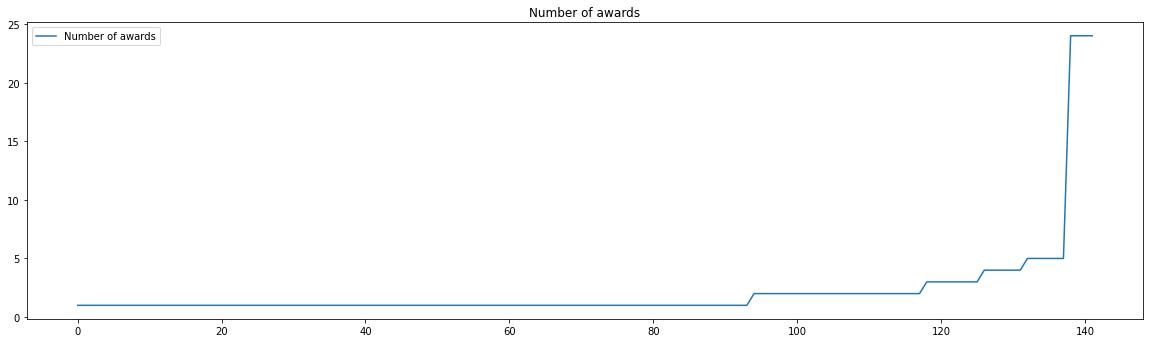

In [60]:
plt.rcParams["figure.figsize"] = (20, 12)

plt.subplot(2, 1, 1)
plt.plot(range(142), ratings_table['winning_count'], label='Number of awards')
plt.title('Number of awards')
plt.legend()

Text(0.5, 1.0, 'Histogramm of obtained awards')

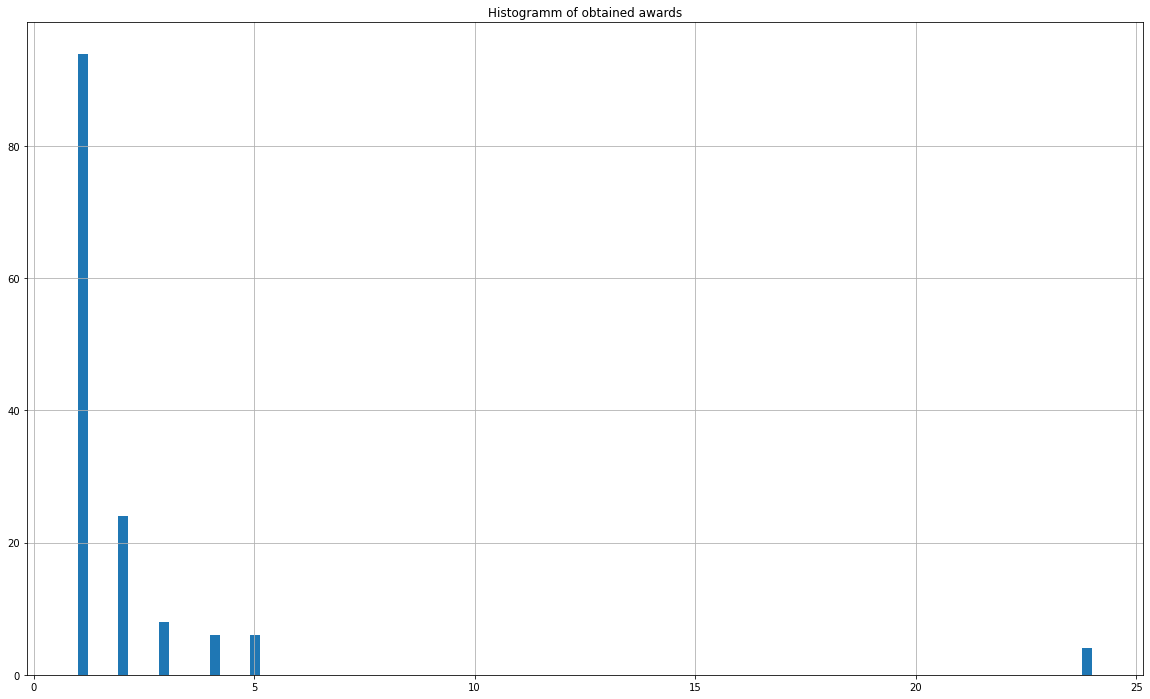

In [67]:
ratings_table.hist(bins=100)
plt.title('Histogramm of obtained awards')

In [74]:
pysqldf('''
    SELECT winning_count
    FROM ratings_table
    ORDER BY winning_count
    LIMIT 1
    OFFSET (SELECT COUNT(*) FROM ratings_table) / 2;
''')

,winning_count
0,1


The results are following: mean and average values of awards obtained by each actor is 1 and 2.22 respectively. And the number of actors who got only one award is almost the same as number of actors who won more then one award. Therefore at this step we figured out that popular actors and 'one film stars' divide in half all workers in the film industry.

Now we will count a probability of getting at least one award and getting more than one award.

In [75]:
pysqldf('''
    SELECT COUNT(Awards) AS number_of_awards_provided
    FROM db
    WHERE Awards == 'Yes'
''')

,number_of_awards_provided
0,163


In [77]:
pysqldf('''
    SELECT COUNT(Awards) AS number_of_all_films
    FROM db
    WHERE Awards == 'No'
''')

,number_of_all_films
0,1496


In [79]:
print('Probability of getting a role in film that will get an award: ', 163 / 1496 * 100, '%')

Probability of getting a role in film that will get an award:  10.89572192513369 %


In [81]:
pysqldf('''
    SELECT COUNT(Actor) AS number_of_actors_with_one_award
    FROM ratings_table
    WHERE winning_count == 1;
''')

,number_of_actors_with_one_award
0,93


In [82]:
pysqldf('''
    SELECT COUNT(Actor) AS number_of_actors_with_more_awards
    FROM ratings_table
    WHERE winning_count != 1;
''')

,number_of_actors_with_more_awards
0,48


In [83]:
print('Probability of getting roles in more than 2 films which will get an award: ', (163 / 1496) * (48 / 93) * 100, '%')

Probability of getting roles in more than 2 films which will get an award:  5.623598412972227 %


# 1. Summary and descovered relationships:

We explored and try to answer the following questions:

1. Well, the first question is about correlation between Awards and Popularity of films. As one can notice, critics and ordinary audience are not always agree about film quality. 

2. There is my own hypotesis: if actor or actress gets an award, he or she has higher probability to get it again. Of course, for everyone it is interesting: "if I will be an actor, do I have a chance to get an award?".

### Question no. 1
Popularity of films with awards not always higher than the popularity of films without awards.

Correlation between critics' opinions and others' priority: -0.03075176388418002, therefore there is no correlation between them.

### Question no. 2
Probability of getting a role in film that will get an award:  10.89572192513369 %.

Probability of getting roles in more than 2 films which will get an award:  5.623598412972227 %.

Therefore, we can see, that about 1/10 of all actors won at least one award and an half of them won at least two awards, so chances having more than one award and being 'one film star' are almost the same.

# 2. Additional questions:

There are many additional problems, that we can explore, using this dataset.

### Future questions:

1. Explore a dynamic of popularity for each type of films from 1928 to 1992.
2. Does the length of the film affect on its award?
3. Describe the period for each actor, when he was popular.